Initial prediction accuracy: 0.488763
Pixel no. 17609 queried, new accuracy: 0.506616
Pixel no. 377513 queried, new accuracy: 0.485513
Pixel no. 481475 queried, new accuracy: 0.477562
Pixel no. 466118 queried, new accuracy: 0.465426
Pixel no. 495568 queried, new accuracy: 0.501143
Pixel no. 492916 queried, new accuracy: 0.568078


Text(0, 0.5, 'Classification Accuracy')

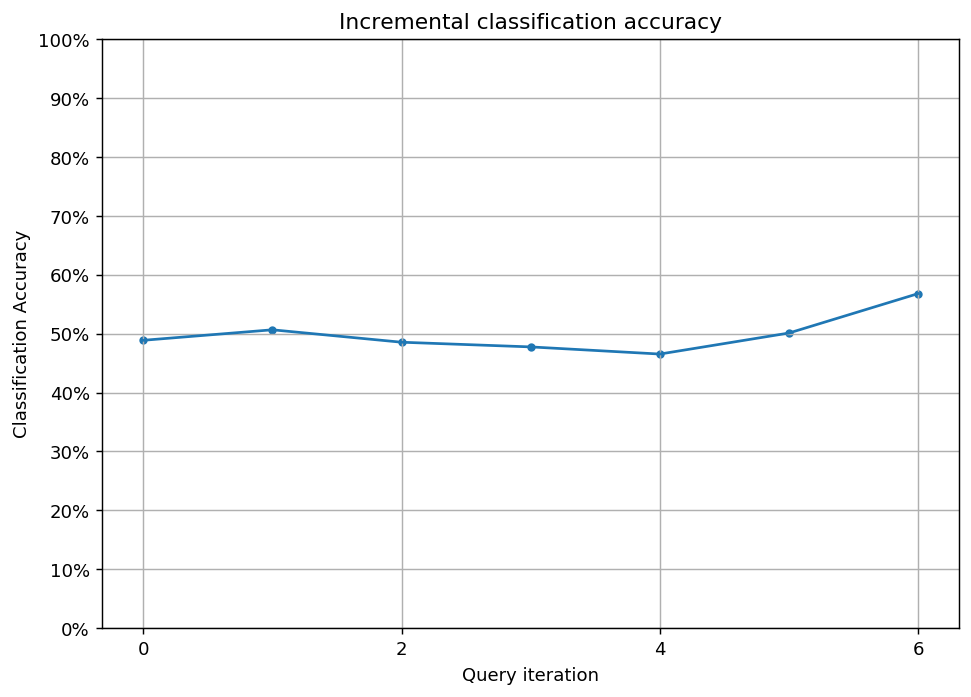

In [14]:

import numpy as np
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)
from sklearn.datasets import fetch_covtype

data = fetch_covtype()
X_full = data['data']
y_full = data['target']



#print(X_full.shape[1])
#print(X_full)
#print(y_full.shape[0])
#print(y_full)



import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#with plt.style.context('seaborn-white'):
#    plt.figure(figsize=(7, 7))
#   plt.imshow(im)
#    plt.title('The shape to learn')
#    plt.show()
    
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner

# assembling initial training set
n_initial = 5
initial_idx = np.random.choice(range(len(X_full)), size=n_initial, replace=False)
X_train, y_train = X_full[initial_idx], y_full[initial_idx]

# initialize the learner
learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    X_training=X_train, y_training=y_train
)
unqueried_score = learner.score(X_full, y_full)

print('Initial prediction accuracy: %f' % unqueried_score)


    
from modAL.uncertainty import classifier_uncertainty

performance_history = [unqueried_score]

# learning until the accuracy reaches a given threshold
while learner.score(X_full, y_full) < 0.9:
    stream_idx = np.random.choice(range(len(X_full)))
    if classifier_uncertainty(learner, X_full[stream_idx].reshape(1, -1)) >= 0.4:
        learner.teach(X_full[stream_idx].reshape(1, -1), y_full[stream_idx].reshape(-1, ))
        new_score = learner.score(X_full, y_full)
        performance_history.append(new_score)
        print('sample no. %d queried, new accuracy: %f' % (stream_idx, new_score))
        
    # Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

AttributeError: iloc

[range(0, 55)]
